# Fbprophet library for Time Series Model


If you are a newbie to python and facing difficulty in building Holt-Winter or ARIMA model. It's a good news for you from facebook, which has created a new [fbprophet](https://facebook.github.io/prophet/docs/quick_start.html) library to forecast time series. It's very simple and easy to use. 

Today we are going to learn how to forecast Kotak Mahindra bank for next 90 days using fbprophet library

In [1]:
# import the necessary libraries
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Import the data from yahoo finance using pandas-datareader
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2017,11,26)
df = web.DataReader('KOTAKBANK.NS', 'yahoo', start, end)

In [12]:
# Convert the dataframe into proper format which fbprophet library can understand
df1 = df.loc[:, ('Close')].reset_index().rename(index=str, columns={"Date": "ds", 'Close': 'y'})

In [13]:
# Remove the missing values
df1 = df1.dropna()

In [14]:
df1.head()

,ds,y
0,2013-01-01,324.975006
1,2013-01-02,328.450012
2,2013-01-03,327.450012
3,2013-01-04,325.100006
4,2013-01-07,324.225006


In [15]:
# Create a Prophet object and fit the data
m = Prophet()
m.fit(df1);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# To make forecast for next 90 days
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1291,2018-02-18
1292,2018-02-19
1293,2018-02-20
1294,2018-02-21
1295,2018-02-22


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1291,2018-02-18,1079.885219,1048.698341,1113.935028
1292,2018-02-19,1100.306281,1069.257190,1134.233296
1293,2018-02-20,1101.143660,1066.217052,1136.014972
1294,2018-02-21,1103.692346,1070.859994,1138.018135
1295,2018-02-22,1105.803900,1070.780086,1139.448888


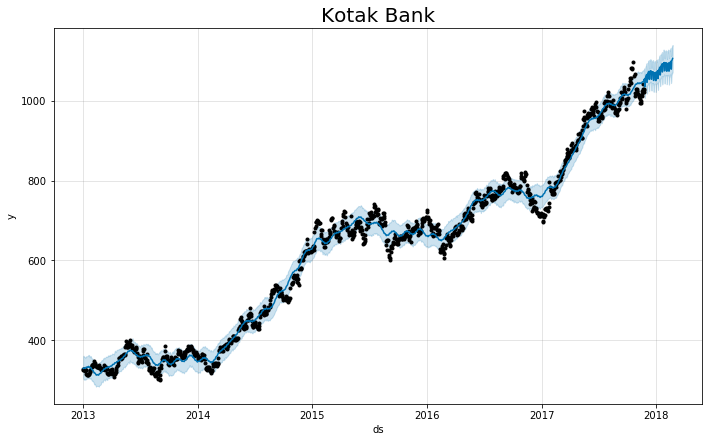

In [18]:
m.plot(forecast)
plt.title('Kotak Bank', fontsize=20)

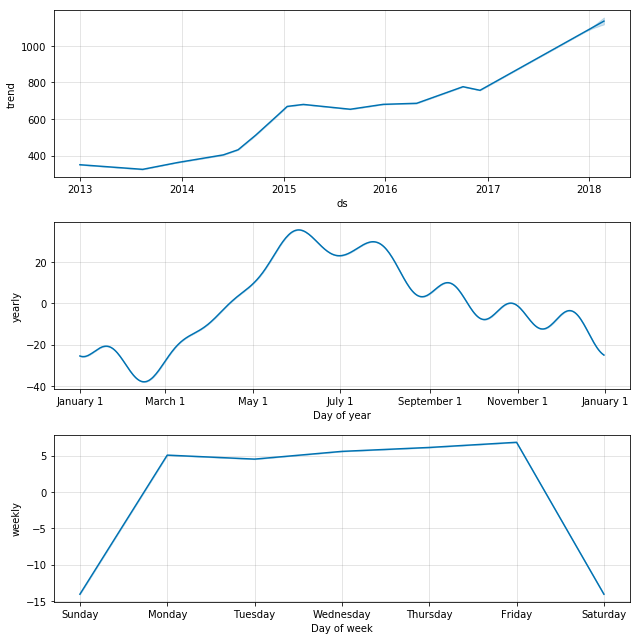

In [19]:
m.plot_components(forecast);